### Feedforward Neural Network
Fully connected <b>feedforward neural networks</b> with different activation functions for digit classification on MNIST data and performance comparison. <br>
Dataset URL : http://yann.lecun.com/exdb/mnist/ <br>
In both setups, the network has 10 hidden layers, with each hidden layer having 10 hidden neurons.
<p>
<b>Batch normalization</b> and <b>ADAM optimizer</b> is used using <b>Keras</b>.
</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [3]:
#mnist dataset
from tensorflow.keras.datasets import mnist

In [4]:
#loading mnist dataset
((Xtrain, Ytrain), (Xtest, Ytest)) = mnist.load_data() 

In [5]:
print("MNIST Dataset")
print("Shape of training data ", Xtrain.shape)
print("Shape of test data ", Xtest.shape)

MNIST Dataset
Shape of training data  (60000, 28, 28)
Shape of test data  (10000, 28, 28)


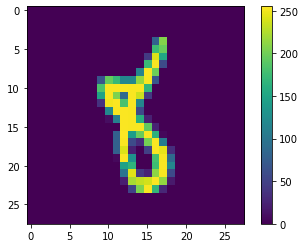

In [6]:
#Showing the testing input
plt.figure()
plt.imshow(Xtest[5678])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
#normalizing data by scaling to the range of [0,1]
Xtrain = Xtrain.astype("float32") / 255.0
Xtest = Xtest.astype("float32") / 255.0

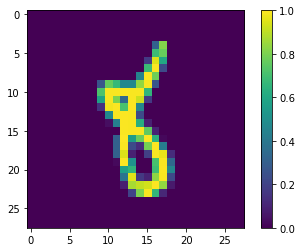

In [8]:
#Showing the testing input
plt.figure()
plt.imshow(Xtest[5678])
plt.colorbar()
plt.grid(False)
plt.show()

### Sigmoid
In the following case, the activation function is <b>sigmoid</b> everywhere.

In [9]:
#converting integer labels to vector labels
Ytrain = LabelBinarizer().fit_transform(Ytrain)
Ytest = LabelBinarizer().fit_transform(Ytest)

In [10]:
#defining deep network architecture
model = Sequential()  #to add layers sequentially as network feedforwards
model.add(Flatten(input_shape = (28,28)))

#creating 10 hidden layers each with 10 neurons
for i in range(10):
    model.add(Dense(10))
    model.add(Activation("sigmoid"))
    model.add(BatchNormalization())
    
model.add(Dense(10, activation = "sigmoid"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                        

In [12]:
#training network using ADAM optimizer
batch_size = 64
adam = Adam(learning_rate = 0.0001)
model.compile(loss = "categorical_crossentropy", optimizer = adam,  metrics = ['accuracy'])
Hyp_1 = model.fit(Xtrain, Ytrain, epochs = 10, validation_data = (Xtest, Ytest), batch_size = batch_size)

Epoch 1/10
938/938 [==============================] - 15s 10ms/step - loss: 1.5060 - accuracy: 0.5283 - val_loss: 1.0731 - val_accuracy: 0.7404
Epoch 2/10
938/938 [==============================] - 9s 9ms/step - loss: 0.9401 - accuracy: 0.7660 - val_loss: 0.7120 - val_accuracy: 0.8311
Epoch 3/10
938/938 [==============================] - 8s 8ms/step - loss: 0.7081 - accuracy: 0.8167 - val_loss: 0.5577 - val_accuracy: 0.8594
Epoch 4/10
938/938 [==============================] - 9s 9ms/step - loss: 0.5853 - accuracy: 0.8419 - val_loss: 0.4700 - val_accuracy: 0.8756
Epoch 5/10
938/938 [==============================] - 8s 8ms/step - loss: 0.5099 - accuracy: 0.8557 - val_loss: 0.4131 - val_accuracy: 0.8872
Epoch 6/10
938/938 [==============================] - 8s 9ms/step - loss: 0.4602 - accuracy: 0.8672 - val_loss: 0.3736 - val_accuracy: 0.8952
Epoch 7/10
938/938 [==============================] - 8s 8ms/step - loss: 0.4172 - accuracy: 0.8781 - val_loss: 0.3481 - val_accuracy: 0.9015
Epoc

In [13]:
#evaluate the network on the testing data to obtain our final classifications
test_loss, test_acc = model.evaluate(Xtest, Ytest)
print("Test accuracy: ", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2939 - accuracy: 0.9144
Test accuracy:  0.9143999814987183


In [14]:
#prediction on test data
predictions = model.predict(Xtest)
print(predictions[5678])
print(np.argmax(predictions[5678]))

313/313 [==============================] - 2s 3ms/step
[0.13249715 0.8003182  0.07801723 0.65638834 0.6160605  0.9963878
 0.8024638  0.01808369 0.9455644  0.20879646]
5


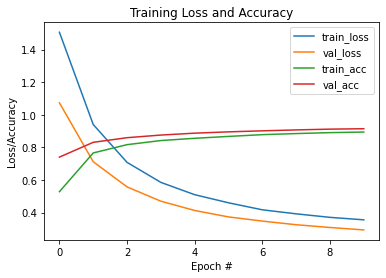

In [15]:
#plot the training loss and accuracy

plt.figure()
plt.plot(np.arange(0, 10), Hyp_1.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), Hyp_1.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), Hyp_1.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), Hyp_1.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

### ReLU
In the following case, the activation function is <b>ReLU</b> everywhere except the outer layer, where it is sigmoid.

In [16]:
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

In [17]:
#normalizing data by scaling to the range of [0,1]
Xtrain = Xtrain.astype("float32") / 255.0
Xtest = Xtest.astype("float32") / 255.0

In [18]:
#converting integer labels to vector labels
Ytrain = LabelBinarizer().fit_transform(Ytrain)
Ytest = LabelBinarizer().fit_transform(Ytest)

In [19]:
#defining deep network architecture
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
for i in range(10):
    model.add(Dense(10))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
model.add(Dense(10, activation = "sigmoid"))

In [20]:
#training network using ADAM optimizer
batch_size = 64
adam = Adam(learning_rate = 0.0001)
model.compile(loss = "categorical_crossentropy", optimizer = adam,  metrics = ['accuracy'])
Hyp_2 = model.fit(Xtrain, Ytrain, epochs = 10, validation_data = (Xtest, Ytest), batch_size = batch_size)

Epoch 1/10
938/938 [==============================] - 14s 10ms/step - loss: 2.3088 - accuracy: 0.1753 - val_loss: 2.0934 - val_accuracy: 0.2367
Epoch 2/10
938/938 [==============================] - 9s 9ms/step - loss: 1.9904 - accuracy: 0.2769 - val_loss: 1.8204 - val_accuracy: 0.3350
Epoch 3/10
938/938 [==============================] - 8s 9ms/step - loss: 1.7482 - accuracy: 0.3765 - val_loss: 1.5757 - val_accuracy: 0.4428
Epoch 4/10
938/938 [==============================] - 8s 8ms/step - loss: 1.5143 - accuracy: 0.4717 - val_loss: 1.3429 - val_accuracy: 0.5228
Epoch 5/10
938/938 [==============================] - 8s 9ms/step - loss: 1.3207 - accuracy: 0.5335 - val_loss: 1.1765 - val_accuracy: 0.5720
Epoch 6/10
938/938 [==============================] - 8s 9ms/step - loss: 1.1668 - accuracy: 0.5910 - val_loss: 1.0226 - val_accuracy: 0.6379
Epoch 7/10
938/938 [==============================] - 8s 9ms/step - loss: 1.0358 - accuracy: 0.6483 - val_loss: 0.8941 - val_accuracy: 0.7090
Epoc

In [21]:
#evaluate the network on the testing data to obtain our final classifications
test_loss, test_acc = model.evaluate(Xtest, Ytest)
print("Test accuracy: ", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.6391 - accuracy: 0.8154
Test accuracy:  0.8154000043869019


In [22]:
#prediction on test data
predictions = model.predict(Xtest)
print(predictions[5678])
print(np.argmax(predictions[5678]))

313/313 [==============================] - 1s 3ms/step
[0.22275043 0.23155513 0.44258964 0.34501022 0.10035796 0.8308286
 0.22100788 0.40528002 0.9731468  0.5384539 ]
8


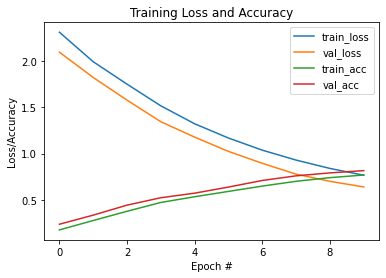

In [23]:
#plot the training loss and accuracy

plt.figure()
plt.plot(np.arange(0, 10), Hyp_2.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), Hyp_2.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), Hyp_2.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), Hyp_2.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

### Performance comparison of the above two cases
The accuracy and loss of the above two cases is compared in the following plot

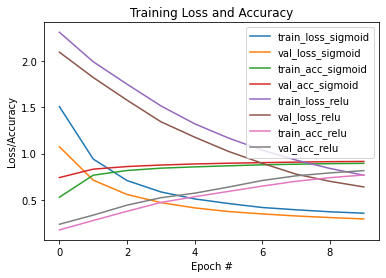

In [24]:
plt.figure()
plt.plot(np.arange(0, 10), Hyp_1.history["loss"], label="train_loss_sigmoid")
plt.plot(np.arange(0, 10), Hyp_1.history["val_loss"], label="val_loss_sigmoid")
plt.plot(np.arange(0, 10), Hyp_1.history["accuracy"], label="train_acc_sigmoid")
plt.plot(np.arange(0, 10), Hyp_1.history["val_accuracy"], label="val_acc_sigmoid")
plt.plot(np.arange(0, 10), Hyp_2.history["loss"], label="train_loss_relu")
plt.plot(np.arange(0, 10), Hyp_2.history["val_loss"], label="val_loss_relu")
plt.plot(np.arange(0, 10), Hyp_2.history["accuracy"], label="train_acc_relu")
plt.plot(np.arange(0, 10), Hyp_2.history["val_accuracy"], label="val_acc_relu")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()